<a href="https://colab.research.google.com/github/sanskar-decoder/Linear_regression_Ml/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=fetch_california_housing()

In [ ]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Description about datset

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
pd.json_normalize(dataset.data)

""
0
1
2
3
4
...
20635
20636
20637
20638


now target values

In [ ]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

## **Convert to dataframes**

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
#let prepare datframe

column_name=dataset.feature_names

In [ ]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

CREATING DATASET :

In [ ]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

Basic check od data

In [ ]:
california_data=df.copy()

In [ ]:
california_data.shape

(20640, 8)

In [ ]:
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
len(df['Latitude'].unique())

862

In [ ]:
df['Latitude'].value_counts()

Latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: count, Length: 862, dtype: int64

df=dataframe contain only independent feature
---

---


california_data=contain both dependent and independent
--

In [ ]:
california_data['Price']=dataset.target

In [ ]:
california_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
california_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

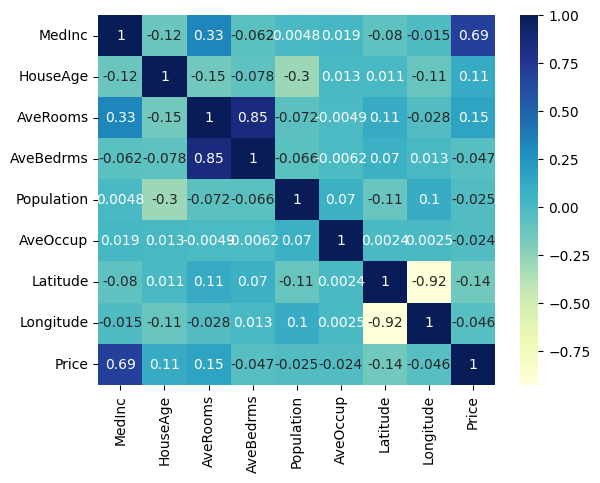

In [ ]:
sns.heatmap(california_data.corr(),cmap="YlGnBu", annot=True)



split independent and dependent feature

In [ ]:
X=california_data.iloc[:,:-1]
y=california_data.loc[:,'Price']

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

Train Test **split**
--

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.33,random_state=45)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

# **Feature Scaling**
---

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

array([[-0.76471678,  0.41336225,  0.02035265, ...,  0.00386146,
        -0.06030937,  0.14254488],
       [-0.67538604,  0.88914488, -0.45643224, ..., -0.00215748,
        -0.72579988,  0.71519042],
       [ 0.33762253,  0.09617383, -0.10976693, ..., -0.02988138,
        -0.79141162,  0.80980142],
       ...,
       [ 1.2140692 , -0.30031169,  0.34507137, ...,  0.01054633,
        -0.62738227,  0.43135741],
       [ 0.93000162, -2.04484799,  0.99925094, ...,  0.04294108,
        -0.77735196,  1.17330684],
       [-0.73298499,  0.88914488, -0.46594679, ..., -0.11502028,
        -1.3491114 ,  1.203184  ]])

In [ ]:
X_train

array([[ 0.25405168,  1.2063333 , -0.10377571, ...,  0.04617579,
         1.65965552, -1.66502319],
       [-0.00556253, -1.88625378, -0.66596938, ..., -0.11318849,
        -1.29287277,  1.16832732],
       [ 0.61430697, -1.25187695,  0.21957957, ..., -0.02491494,
        -0.3555622 , -0.43508018],
       ...,
       [-0.55201954, -0.3796088 , -0.22531407, ..., -0.08572207,
         1.41595477, -0.87825802],
       [ 0.05947193, -0.85539142, -0.29487079, ...,  0.05863805,
        -0.73048643,  0.88947384],
       [ 1.55107547,  0.57195646,  0.66052564, ..., -0.03194794,
        -0.66956124,  0.72514947]])

In [ ]:


X_test


array([[-0.76471678,  0.41336225,  0.02035265, ...,  0.00386146,
        -0.06030937,  0.14254488],
       [-0.67538604,  0.88914488, -0.45643224, ..., -0.00215748,
        -0.72579988,  0.71519042],
       [ 0.33762253,  0.09617383, -0.10976693, ..., -0.02988138,
        -0.79141162,  0.80980142],
       ...,
       [ 1.2140692 , -0.30031169,  0.34507137, ...,  0.01054633,
        -0.62738227,  0.43135741],
       [ 0.93000162, -2.04484799,  0.99925094, ...,  0.04294108,
        -0.77735196,  1.17330684],
       [-0.73298499,  0.88914488, -0.46594679, ..., -0.11502028,
        -1.3491114 ,  1.203184  ]])

Model creation
---

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([ 0.83796365,  0.11590073, -0.28628208,  0.30756014, -0.00522466,
       -0.04563029, -0.8998872 , -0.87488319])

In [ ]:
regressor.intercept_

2.0688783923922474

In [ ]:
X_test.shape

(6812, 8)

In [ ]:
X_train.shape

(13828, 8)

In [ ]:
y_train.shape

(13828,)

In [ ]:
y_train

3261     0.68300
14506    1.76600
17339    1.94000
4033     5.00001
13173    3.36800
          ...   
16547    1.21500
16317    0.87500
12895    1.83200
6012     1.13500
6558     3.59400
Name: Price, Length: 13828, dtype: float64

In [ ]:
predict=regressor.predict(X_test)

In [ ]:
predict.shape

(6812,)

In [ ]:
X_train.shape

(13828, 8)

In [ ]:
X_test

array([[-0.76471678,  0.41336225,  0.02035265, ...,  0.00386146,
        -0.06030937,  0.14254488],
       [-0.67538604,  0.88914488, -0.45643224, ..., -0.00215748,
        -0.72579988,  0.71519042],
       [ 0.33762253,  0.09617383, -0.10976693, ..., -0.02988138,
        -0.79141162,  0.80980142],
       ...,
       [ 1.2140692 , -0.30031169,  0.34507137, ...,  0.01054633,
        -0.62738227,  0.43135741],
       [ 0.93000162, -2.04484799,  0.99925094, ...,  0.04294108,
        -0.77735196,  1.17330684],
       [-0.73298499,  0.88914488, -0.46594679, ..., -0.11502028,
        -1.3491114 ,  1.203184  ]])

In [ ]:
y_test

3046     0.658
6803     2.284
10112    2.411
3126     1.375
5008     1.930
         ...  
15546    1.770
4126     1.865
20498    2.298
12119    1.977
14028    1.987
Name: Price, Length: 6812, dtype: float64

In [ ]:
error_detection=pd.DataFrame({'Actual':y_test,'predicted':predict})

In [ ]:
error_detection.reset_index(inplace=True)

In [ ]:
error_detection.drop(['index'],inplace=True,axis=1)

In [ ]:
error_detection['residual']=error_detection['Actual']-error_detection['predicted']

In [ ]:
mean_error=error_detection['residual'].mean()

In [ ]:
error_detection

,Actual,predicted,residual
0,0.658,1.388883,-0.730883
1,2.284,1.706064,0.577936
2,2.411,2.335415,0.075585
3,1.375,1.060674,0.314326
4,1.930,2.320727,-0.390727
...,...,...,...
6807,1.770,1.919101,-0.149101
6808,1.865,2.065151,-0.200151
6809,2.298,3.041570,-0.743570
6810,1.977,1.953281,0.023719


Perfomance Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# from sklearn.metrics import mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,predict)
mae=mean_absolute_error(y_test,predict)
rqsrt=np.sqrt(mean_squared_error(y_test,predict))

print(mse,mae,rqsrt)

0.5254750014172865 0.5305452487176576 0.7248965453202868


In [ ]:
r1=np.sqrt(mse)

check  model accuracy

---



---



In [ ]:
from sklearn.metrics import r2_score


In [ ]:
score=r2_score(y_test,predict)

In [ ]:
score

0.6030718284530419

For training data

y_train=is actual point


In [ ]:
train_predict=regressor.predict(X_train)

In [ ]:
score1=r2_score(y_train,train_predict)

In [ ]:
score1

0.6065998730443565

## ASSUMPTION

For Testing Data

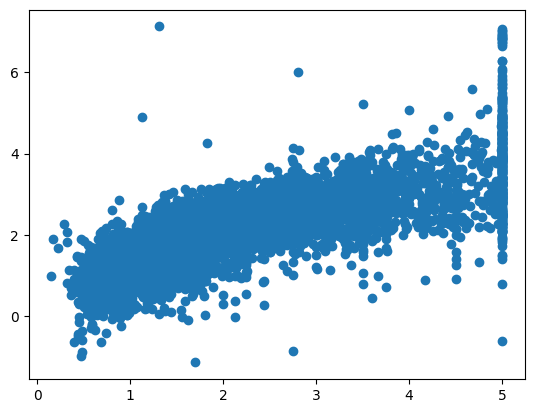

In [ ]:
plt.scatter(y_test,predict)

<Axes: xlabel='residual', ylabel='Count'>

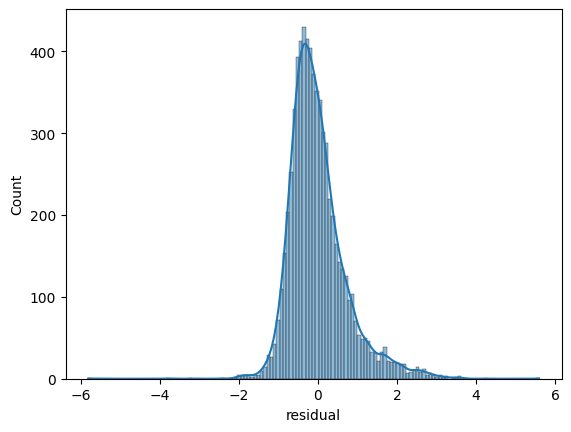

In [ ]:
sns.histplot(error_detection['residual'],kde=True)

checking mse for both training and testing data

## **Self Assumption**

In [ ]:
mse1=mean_squared_error(y_test,predict)
mse2=mean_squared_error(y_train,train_predict)

model is

In [ ]:
print(mse1)
print(mse2)

0.5254750014172865
0.5253234377909518


* If both the training and validation errors are high and close to each other,
  your model is likely underfitting.
* If the training error is low but the validation error is high, your model
  might be overfitting.
* If both errors are low, your model is likely well-fitted.

## pickling

In [ ]:
import pickle
pickle.dump(regressor,open('model1.pkl','wb'))

In [ ]:
house_predict_model=pickle.load(open('model1.pkl','rb'))

In [ ]:
house_predict_model.predict(X_test)

array([1.38888349, 1.70606392, 2.33541478, ..., 3.04156992, 1.95328141,
       1.86263488])

In [ ]:
error_detection

,Actual,predicted,residual
0,0.658,1.388883,-0.730883
1,2.284,1.706064,0.577936
2,2.411,2.335415,0.075585
3,1.375,1.060674,0.314326
4,1.930,2.320727,-0.390727
...,...,...,...
6807,1.770,1.919101,-0.149101
6808,1.865,2.065151,-0.200151
6809,2.298,3.041570,-0.743570
6810,1.977,1.953281,0.023719
